In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
df = pd.read_csv("C:/Users/lenovo/OneDrive/Desktop/lets grow more/NSE-TATAGLOBAL11.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [12]:
# Only consider the 'Close' column for simplicity
data = df['Close'].values.reshape(-1, 1)

In [13]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

In [14]:
# Split the data into training and testing sets
training_data_len = int(np.ceil(len(data) * .95))
train_data = data_normalized[0:int(training_data_len), :]

In [15]:
# Create the training dataset
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# Reshape the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



Train on 1114 samples
1114/1114 [==============================] - 27s 23ms/sample - loss: 0.0026


In [23]:
# Create the testing dataset
test_data = data_normalized[training_data_len - 60:, :]

In [24]:
# Create the datasets x_test and y_test
x_test, y_test = [], data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [25]:
# Convert x_test to a numpy array
x_test = np.array(x_test)

In [26]:
# Reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [28]:
# Evaluate the model (Root Mean Squared Error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 9.706303330718494


In [29]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10644\64974903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


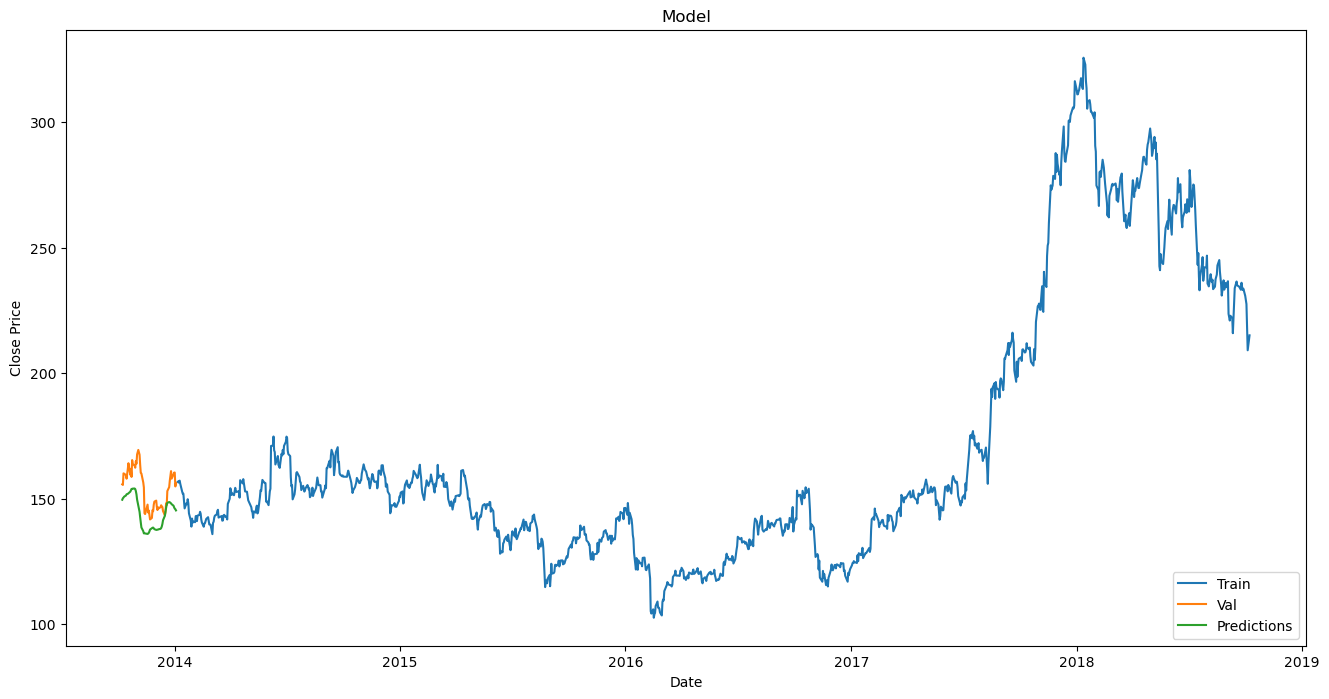

In [30]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()